## Problem Statement: 

### Apollo Hospitals is the nation's first corporate hospital and is acclaimed for pioneering the private healthcare revolution in the country. By using this data help apollo hospitals to learn which factors mostly impact the hospitalization charges for different regions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('scaler_apollo_hospitals.csv')

In [3]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [4]:
df = df.drop(columns = 'Unnamed: 0', axis = 0)
df

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


In [5]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [6]:
#There are no missing values in this data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


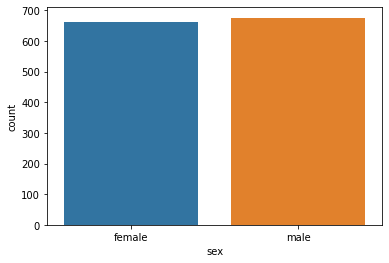

In [7]:
sns.countplot(x = df['sex'])
plt.show()

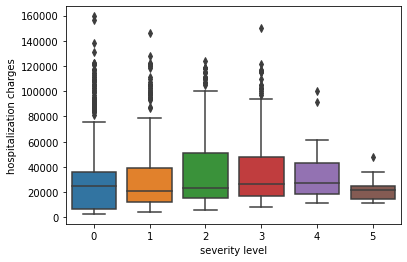

In [8]:
sns.boxplot(x = df['severity level'], y = df['hospitalization charges'])
plt.show()

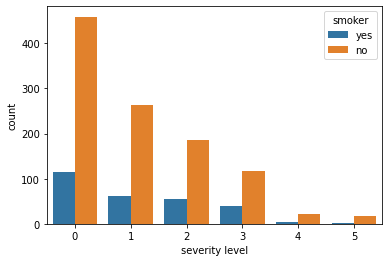

In [9]:
sns.countplot(x = df['severity level'], hue = 'smoker', data =df)
plt.show()

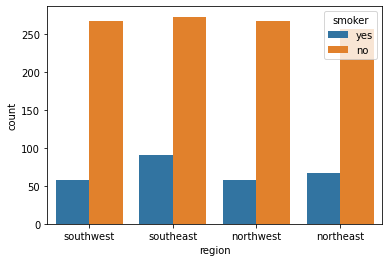

In [10]:
sns.countplot(x = df['region'], hue = 'smoker', data =df)
plt.show()

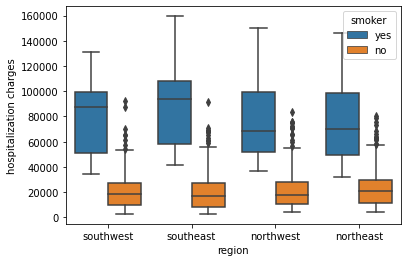

In [11]:
# Hospitalization charges for the people in southeast region tend to be on higher side than other regions for smokers
sns.boxplot( x= df['region'], y = df['hospitalization charges'], hue='smoker', data =df)
plt.show()

<AxesSubplot:xlabel='smoker', ylabel='count'>

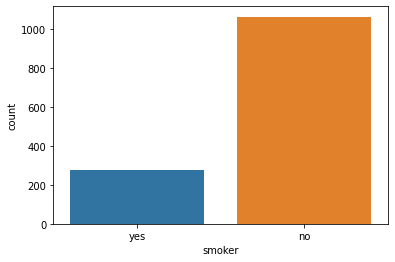

In [12]:
sns.countplot(x = df['smoker'])

In [13]:
df.corr()

,age,viral load,severity level,hospitalization charges
age,1.000000,0.109300,0.042469,0.299008
viral load,0.109300,1.000000,0.012729,0.198388
severity level,0.042469,0.012729,1.000000,0.067998
hospitalization charges,0.299008,0.198388,0.067998,1.000000


In [14]:
# As data around hospitalization charges is lor normally distributed, we comverted that to normal by applying log
df['hospitalization charges'] = np.log(df['hospitalization charges'])

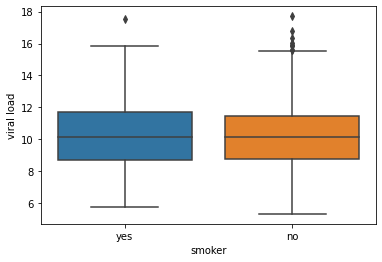

In [15]:
# viral load seems to be same for both smoker and non-smoker
sns.boxplot(x = df['smoker'], y = df['viral load'], orient = 'v')
plt.show()

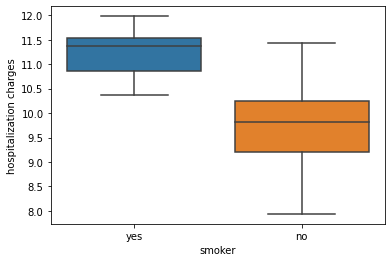

In [16]:
# Visually we can interpret that the hospitalization charges for a person who smokes is higher
sns.boxplot(x = df['smoker'],y = df['hospitalization charges'])
plt.show()

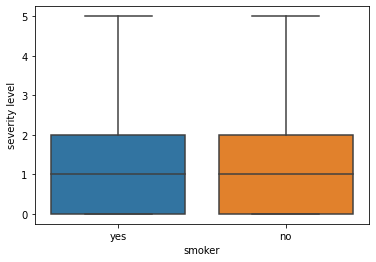

In [17]:
sns.boxplot(x = df['smoker'],y = df['severity level'])
plt.show()

In [18]:
#outlier treatment

q1 = df['viral load'].quantile(0.25)
q3 = df['viral load'].quantile(0.75)

IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['viral load'] < lower_bound) | (df['viral load'] > upper_bound)]

outliers

,age,sex,smoker,region,viral load,severity level,hospitalization charges
116,58,male,no,southeast,16.35,0,10.256009
286,46,female,no,northeast,16.02,2,10.068239
401,47,male,no,southeast,15.84,1,9.913933
543,54,female,yes,southeast,15.80,0,11.979335
847,23,male,no,southeast,16.79,1,8.715224
860,37,female,yes,southwest,15.87,2,11.655154
1047,22,male,yes,southeast,17.53,1,11.619562
1088,52,male,no,southeast,15.91,1,10.101190
1317,18,male,no,southeast,17.71,0,7.975565


In [19]:
#since there are only few outliers, we chose to remove them
df.drop(outliers.index, inplace = True)

In [20]:
# After removing the outliers
df.shape

(1329, 7)

# Hypothesis Testing

## T-test Right tailed

### Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't?

#### Null Hypothesis ( H0) = Hospitalization charges of the people who smoke are as same as the people that don't smoke
#### Alternate Hypothesis ( Ha) = Hospitalization charges of the people who smoke are greater than the people that don't smoke

In [21]:
df.smoker.value_counts()

no     1058
yes     271
Name: smoker, dtype: int64

In [22]:
smoker_hosp_charges = df[df['smoker'] == 'yes']['hospitalization charges'].sample(271)
non_smoker_hosp_charges = df[df['smoker'] == 'no']['hospitalization charges'].sample(271)

In [23]:
from scipy.stats import ttest_ind

In [24]:
statistic, pvalue = ttest_ind(smoker_hosp_charges, non_smoker_hosp_charges, alternative='greater')

In [25]:
pvalue

1.4960679101378134e-104

#### As the p-value is closer to zero, we reject the null hypothesis and confirm that the hospitalization charges of the people who smoke are much greater than people who don't smoke


## T-test Two tailed

### Prove (or disprove) with statistical evidence that the viral load of females is different from that of males

#### Null Hypothesis ( H0) = viral load of the female is as same as the viral load of males
#### Alternate Hypothesis ( Ha) = viral load of the female is not same as the viral load of males

In [26]:
df.sex.value_counts()

male      670
female    659
Name: sex, dtype: int64

In [27]:
viral_load_in_male = df[df['sex'] == 'male']['viral load'].sample(659)
viral_load_in_female = df[df['sex'] == 'female']['viral load'].sample(659)

In [28]:
test_stat, p_value = ttest_ind(viral_load_in_male, viral_load_in_female, alternative='two-sided')

In [29]:
p_value

0.13005476657855083

#### As p-value is greater than 0.05, we fail to reject the null hypothesis and confirm that viral load of female is as same as the viral load of male

## Chi Square Test

### Is the proportion of smoking significantly different across different regions?

#### Null Hypothesis (H0) : There is no significant difference across different regions in proportion of smoking
#### Alternate Hypothesis (Ha) : There is a significant difference across different regions in proportion of smoking

In [30]:
data_1 = pd.crosstab(df['smoker'], df['region'], margins = True)
data_1

region,northeast,northwest,southeast,southwest,All
smoker,,,,,
no,256,267,268,267,1058
yes,67,58,89,57,271
All,323,325,357,324,1329


In [31]:
observed = data_1.iloc[0:2,0:4]

In [32]:
observed

region,northeast,northwest,southeast,southwest
smoker,,,,
no,256,267,268,267
yes,67,58,89,57


In [33]:
expected = np.outer(data_1['All'][0:2], data_1.loc['All'][0:4])/1338

In [34]:
expected = pd.DataFrame(expected)
expected.columns = ['northeast', 'northwest', 'southeast', 'southwest']
expected.index = ['no','yes']

In [35]:
expected

,northeast,northwest,southeast,southwest
no,255.406577,256.988042,282.291480,256.197309
yes,65.420777,65.825859,72.307175,65.623318


In [36]:
chi_squared_stat = ((observed - expected)**2/expected).sum().sum()
chi_squared_stat

7.525843203895013

In [37]:
from scipy.stats import chi2
critical_value = chi2.ppf

In [38]:
alpha = 0.05
df = 3

In [39]:
critical_value = chi2.ppf(q = 1-alpha, df= df)

In [40]:
critical_value

7.814727903251179

In [41]:
p_value = 1 - chi2.cdf(x = chi_squared_stat, df = 3)

In [42]:
p_value

0.05689813446159697

#### As p_value is greater than 0.05, we failed to reject the null hypothesis and confirm that there is no significant difference across regions in proportion of smoking.

## Anova

### Is the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level the same ?

#### Null Hypothesis (H0) : Viral load is same across the severity levels
#### Alternate Hypothesis (Ha) : Viral load is not same across the severity levels

In [45]:
df_men = df[df['sex'] == 'male']
df_women = df[df['sex'] == 'female']

In [46]:
df_women['severity level'].value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: severity level, dtype: int64

In [47]:
sev_level_0 = df_women[df_women['severity level'] == 0]['viral load'].sample(117)
sev_level_1 = df_women[df_women['severity level'] == 1]['viral load'].sample(117)
sev_level_2 = df_women[df_women['severity level'] == 2]['viral load'].sample(117)

In [48]:
import scipy.stats as stats
stats.f_oneway(sev_level_0, sev_level_1, sev_level_2)

F_onewayResult(statistic=0.5516250215780196, pvalue=0.5765158372830511)

#### As p_value is greater than 0.05, we failed to reject the null hypothesis and confirm that the mean viral load of women with 0 severity level and 1 severity level and 2 severity level is same